In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head())
print(df.tail())
print(df.sample(5))


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1
      User ID  Gender  Age  EstimatedSalary  Purchased
53   15671655  Female   35            23000          0
33   15776733  Female   28            44000          0
374  15793890  Female   37            80000          0
119  15701962    Male   41            59000          0
266  15721592    Male   40            75000          0


In [57]:
df.size

2000

In [58]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [59]:
df = df.drop('User ID',axis=1)


In [60]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [61]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [62]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes


In [71]:
df.head()

,Gender,Age,Salary,Purchased
0,1,19,0.126667,0
1,1,35,0.133333,0
2,0,26,0.286667,0
3,0,27,0.380000,0
4,1,19,0.506667,0


In [64]:
from sklearn.preprocessing import MaxAbsScaler
df[['EstimatedSalary']] = MaxAbsScaler().fit_transform(df[['EstimatedSalary']])

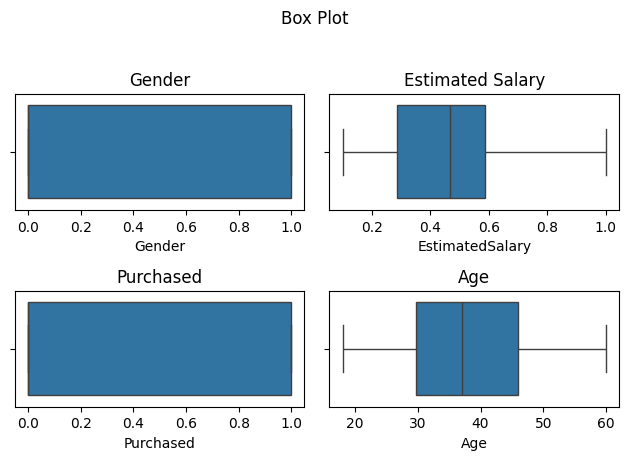

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2)  # 2x2 grid of subplots
fig.suptitle("Box Plot")

sns.boxplot(data=df, x='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender')

sns.boxplot(data=df, x='EstimatedSalary', ax=axes[0, 1])
axes[0, 1].set_title('Estimated Salary')

sns.boxplot(data=df, x='Purchased', ax=axes[1, 0])
axes[1, 0].set_title('Purchased')

sns.boxplot(data=df, x='Age', ax=axes[1, 1])
axes[1, 1].set_title('Age')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


In [66]:
def removeOutliers(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    high = Q3 + IQR*1.5
    low = Q1 - IQR*1.5
    
    return df[((df[var] >= low) & (df[var] <= high))]

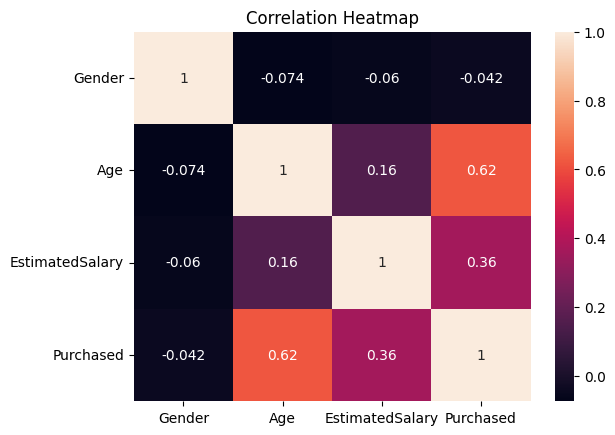

In [67]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def BuildModel(X, Y):
    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=13)

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(solver = 'lbfgs')
    model = model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ytest, ypred)
    
    sns.heatmap(cm, annot=True)
    plt.show()

    from sklearn.metrics import classification_report
    print(classification_report(ytest, ypred))


In [72]:
df.columns = ['Gender', 'Age', 'Salary', 'Purchased']

In [74]:
print('Statistical information of Numerical Columns: \n',df.describe())
print('Total Number of Null Values in Dataset:', df.isna().sum())


Statistical information of Numerical Columns: 
            Gender         Age      Salary   Purchased
count  400.000000  400.000000  400.000000  400.000000
mean     0.490000   37.655000    0.464950    0.357500
std      0.500526   10.482877    0.227313    0.479864
min      0.000000   18.000000    0.100000    0.000000
25%      0.000000   29.750000    0.286667    0.000000
50%      0.000000   37.000000    0.466667    0.000000
75%      1.000000   46.000000    0.586667    1.000000
max      1.000000   60.000000    1.000000    1.000000
Total Number of Null Values in Dataset: Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64


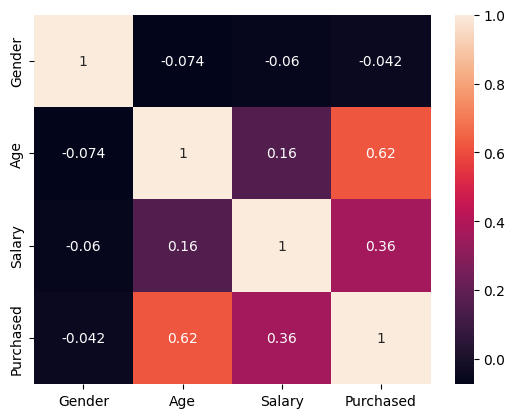

In [76]:
sns.heatmap(df.corr(),annot=True)
plt.show()


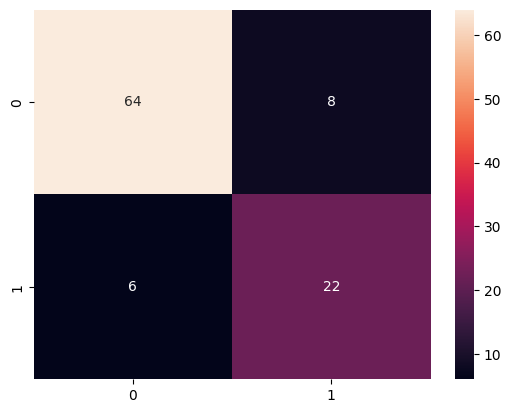

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.73      0.79      0.76        28

    accuracy                           0.86       100
   macro avg       0.82      0.84      0.83       100
weighted avg       0.86      0.86      0.86       100



In [78]:
X = df[['Age','Salary']]
Y = df['Purchased']
BuildModel(X, Y)


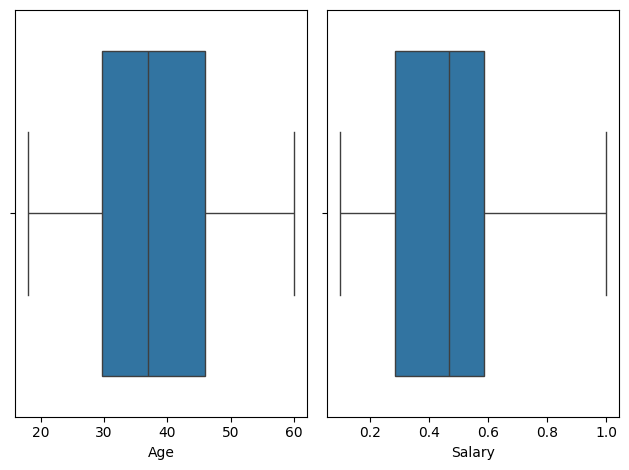

In [80]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='Age', ax=axes[0])
sns.boxplot(data = df, x ='Salary', ax=axes[1])
fig.tight_layout()
plt.show()


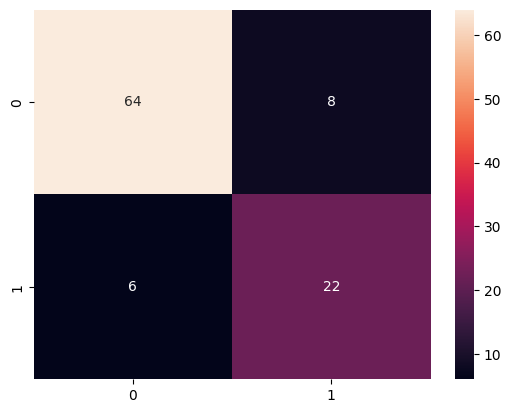

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.73      0.79      0.76        28

    accuracy                           0.86       100
   macro avg       0.82      0.84      0.83       100
weighted avg       0.86      0.86      0.86       100



In [82]:
df = removeOutliers(df, 'Age')
df = removeOutliers(df, 'Salary')
X = df[['Age','Salary']]
Y = df['Purchased']
BuildModel(X, Y)


# Term | Meaning | Example
# TP (True Positive) | Model predicted Positive, and it was actually Positive | Model says “yes” → actual is “yes”
# TN (True Negative) | Model predicted Negative, and it was actually Negative | Model says “no” → actual is “no”
# FP (False Positive) | Model predicted Positive, but it was actually Negative | Model says “yes” → actual is “no” (Type I Error)
# FN (False Negative) | Model predicted Negative, but it was actually Positive | Model says “no” → actual is “yes” (Type II Error)
     

In [85]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=13)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model = model.fit(xtrain,ytrain)

ypred = model.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[64  8]
 [ 6 22]]


In [89]:
a = cm.shape
correct = 0
inCorrect = 0

for row in range(a[0]):
    for col in range(a[1]):
        if row == col:
            correct += cm[row][col]
        else:
            inCorrect += cm[row][col]

print("Correct Predicted : ",correct)
print("Incorrected Predicted : ",inCorrect)
print("Accuracy : ",correct/(correct+inCorrect))


Correct Predicted :  86
Incorrected Predicted :  14
Accuracy :  0.86


In [91]:
tp = cm[0][0]
tn = cm[1][1]
fp = cm[1][0]
fn = cm[0][1]

print("Recall : ",tp/(tp+fn))
print("Precision : ",tp/(tp+fp))
print("Accuracy : ",(tp+tn)/(tp+tn+fp+fn))

Recall :  0.8888888888888888
Precision :  0.9142857142857143
Accuracy :  0.86
